In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.markets import *
from sharkfin.simulation import *
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from HARK.core import AgentType
from HARK.ConsumptionSaving.ConsPortfolioModel import SequentialPortfolioConsumerType
from simulate.parameters import (
    agent_population_params,
    approx_params,
    continuous_dist_params,
)

parameter_dict = agent_population_params | continuous_dist_params
parameter_dict["AgentCount"] = 1

def build_population(agent_type : AgentType, parameters : dict):
    pop = AgentPopulation(agent_type(), parameters)
    pop.approx_distributions(approx_params)
    pop.parse_params()

    pop.create_distributed_agents()
    pop.create_database()
    pop.solve_distributed_agents()

    pop.solve(merge_by=["RiskyAvg", "RiskyStd"])

    # initialize population model
    pop.init_simulation()
    
    return pop

In [3]:
def run_simulation(
    agent_parameters,
    a=None,
    q=None,
    r= None,
    fm=None,
    market=None,
    dphm=1500,
    days_per_quarter=None
):
    #initialize population
    pop = build_population(SequentialPortfolioConsumerType, agent_parameters)
    
    market = MockMarket()
    
    #initialize the financial Fodel
    Fm = FinanceModel
    
    #initialize population model
    pop.init_simulation()
    
    attsim = AttentionSimulation(
        pop, Fm, a=a, q=q, r=r, market=market, dphm=dphm, days_per_quarter = days_per_quarter
    )
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [4]:
sim, sim_stats = run_simulation(
    parameter_dict,
    a=0.2,
    q=4,
    #r = 10,
    days_per_quarter = 60,
    dphm=10500
)

/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_met

Q-0
run_market, buy_sell: (459, 104)
price: 100.55590029027988
run_market, buy_sell: (108, 0)
price: 100.77546469219118
run_market, buy_sell: (324, 7)
price: 100.32311183114751
run_market, buy_sell: (57, 78)
price: 98.19418706109136
run_market, buy_sell: (106, 101)
price: 99.2765878094074
run_market, buy_sell: (307, 165)
price: 99.50903680825624
run_market, buy_sell: (433, 54)
price: 99.46367696516445
run_market, buy_sell: (19, 34)
price: 99.21016030689434
run_market, buy_sell: (441, 24)
price: 100.16815564014203
run_market, buy_sell: (104, 41)
price: 98.28583942290652
run_market, buy_sell: (598, 241)
price: 100.27724111803361
run_market, buy_sell: (429, 144)
price: 99.8043850504488
run_market, buy_sell: (33, 145)
price: 99.18031064976194
run_market, buy_sell: (199, 0)
price: 100.23395698662416
run_market, buy_sell: (590, 83)
price: 101.40769280443624
run_market, buy_sell: (852, 132)
price: 101.71224006101536
run_market, buy_sell: (7, 170)
price: 101.39924290164014
run_market, buy_sell

run_market, buy_sell: (497, 2128)
price: 88.94769204571789
run_market, buy_sell: (1294, 2027)
price: 90.088221176253
run_market, buy_sell: (182, 371)
price: 89.65294636687977
run_market, buy_sell: (1345, 889)
price: 90.84591802656516
run_market, buy_sell: (2464, 1170)
price: 91.22260413751464
run_market, buy_sell: (3348, 406)
price: 91.5390752384593
run_market, buy_sell: (784, 246)
price: 94.21633923199572
run_market, buy_sell: (545, 602)
price: 95.3359675782575
run_market, buy_sell: (613, 1762)
price: 96.4557129278405
run_market, buy_sell: (3, 2241)
price: 96.68030115801439
run_market, buy_sell: (0, 1398)
price: 98.07409805637253
run_market, buy_sell: (181, 2141)
price: 99.34189536476168
run_market, buy_sell: (124, 1889)
price: 99.94415679212568
run_market, buy_sell: (3, 1599)
price: 97.8523482769741
run_market, buy_sell: (1639, 519)
price: 97.3456671210336
run_market, buy_sell: (2339, 783)
price: 97.29115357143905
run_market, buy_sell: (909, 516)
price: 97.09182963916092
run_market, 

In [5]:
data = sim.data()

In [6]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,100.555900,459,104,0,0,6151.946523,743395.028057,28541.959199,0.000000,NaN,0.006397,0.000845,0.011809
1,1,100.775465,108,0,0,0,6260.863747,745631.948707,28564.218484,29407.487274,0.000000e+00,0.003019,0.000925,0.011590
2,2,100.323112,324,7,0,0,6577.906860,743252.466549,28586.477768,29697.837816,0.000000e+00,-0.003659,0.000740,0.011406
3,3,98.194187,57,78,0,0,6543.440699,730066.607725,28608.737053,29534.766279,0.000000e+00,-0.020405,-0.000103,0.011907
4,4,99.276588,106,101,0,13,6540.688990,738025.933659,28630.996338,29405.395703,0.000000e+00,0.011866,0.000394,0.011918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,103.504336,896,48,0,21,21501.831583,534200.604970,71786.881815,39699.841258,2.868216e-01,-0.018498,0.000768,0.014300
236,236,103.394097,448,1193,0,487,20316.333433,511523.938325,73335.310257,66653.227797,1.688123e-01,-0.000233,0.000694,0.013764
237,237,102.624761,115,1194,0,928,20164.800595,497734.944582,73335.310257,0.000000,1.688123e-01,-0.006614,0.000155,0.013383
238,238,103.432750,114,410,0,0,19868.778138,515501.267761,73335.310257,0.000000,1.688123e-01,0.008713,0.000787,0.013072


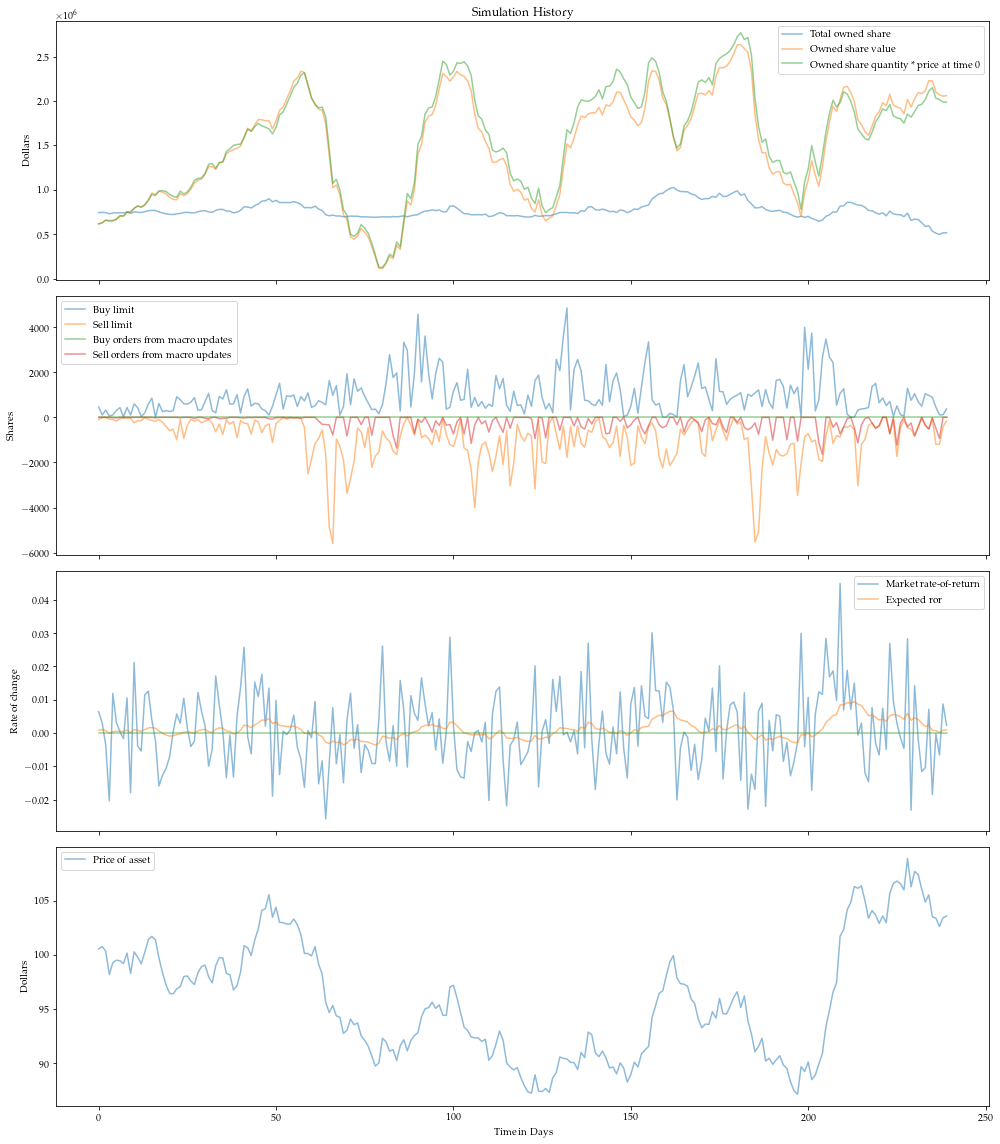

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [8]:
sim.days_per_quarter

60

In [9]:
sim.market.prices

[100,
 100.55590029027988,
 100.77546469219118,
 100.32311183114751,
 98.19418706109136,
 99.2765878094074,
 99.50903680825624,
 99.46367696516445,
 99.21016030689434,
 100.16815564014203,
 98.28583942290652,
 100.27724111803361,
 99.8043850504488,
 99.18031064976194,
 100.23395698662416,
 101.40769280443624,
 101.71224006101536,
 101.39924290164014,
 99.70139890022492,
 98.35356807526551,
 97.22345517241416,
 96.44680303277136,
 96.3973832796329,
 96.86406484291459,
 97.06660562570616,
 98.00174250867495,
 98.05671815477287,
 97.57709980613875,
 97.25971921897828,
 98.36460309833032,
 98.92267091741932,
 99.05192970912883,
 97.97917479644758,
 97.41894128298873,
 99.00188322982899,
 99.75548882524245,
 99.71064884953424,
 98.28952141327285,
 98.14912762718345,
 96.765941343071,
 97.16361585331688,
 98.40748298973794,
 100.85853234549344,
 100.6603228335039,
 99.94316738827457,
 101.3846789250256,
 102.40657091145071,
 104.12536577890572,
 104.2524274268877,
 105.56603462719438,
 103.4

In [10]:
sim.market.dividends

[0.08333333333333333,
 0.08379658357523323,
 0.08397955391015932,
 0.08360259319262293,
 0.08182848921757613,
 0.08273048984117283,
 0.08292419734021353,
 0.08288639747097037,
 0.08267513358907862,
 0.0834734630334517,
 0.08190486618575543,
 0.08356436759836135,
 0.083170320875374,
 0.08265025887480161,
 0.08352829748885347,
 0.08450641067036353,
 0.08476020005084614,
 0.08449936908470011,
 0.08308449908352077,
 0.08196130672938792,
 0.0810195459770118,
 0.0803723358606428,
 0.08033115273302742,
 0.08072005403576216,
 0.0808888380214218,
 0.08166811875722912,
 0.08171393179564405,
 0.08131424983844895,
 0.08104976601581523,
 0.08197050258194194,
 0.08243555909784944,
 0.08254327475760735,
 0.08164931233037298,
 0.08118245106915727,
 0.08250156935819082,
 0.08312957402103538,
 0.08309220737461187,
 0.08190793451106071,
 0.08179093968931954,
 0.08063828445255918,
 0.08096967987776407,
 0.08200623582478161,
 0.08404877695457787,
 0.08388360236125325,
 0.08328597282356215,
 0.0844872324375

In [11]:
[sim.market.prices[i] / sim.market.dividends[i] for i in range(1, len(sim.market.prices))]

[1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 

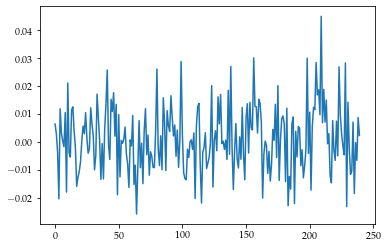

In [12]:
plt.plot(sim.market.ror_list())

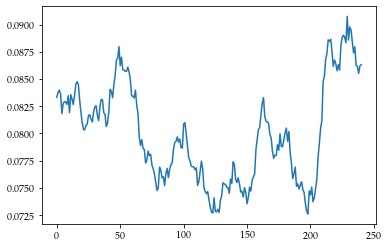

In [13]:
plt.plot(sim.market.dividends)

In [14]:
sim.market.next_dividend()

0.08409132974380883

In [15]:
sim.market.dividends[-1]

0.0863206502928582

In [16]:
mean([sim.market.next_dividend() / sim.market.dividends[-1] for i in range(1000000)

SyntaxError: incomplete input (1036260296.py, line 1)